In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
male = pd.read_csv("Indian-Male-Names.csv")
female = pd.read_csv("Indian-Female-Names.csv")

In [3]:
male.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [4]:
female.head()

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian


In [5]:
frames = [male,female]
df = pd.concat(frames,ignore_index=True)

In [6]:
df = df.sample(frac=1)
df.head()

,name,gender,race
20441,jinat,f,indian
1040,arjun yadav,m,indian
22635,nuraish,f,indian
15391,jyoti devi,f,indian
15222,kiran,f,indian


In [7]:
df = (df.assign( firstname = lambda x : x.name.str.split(' ').str[0]))
df.drop(['race'], axis=1).head()


,name,gender,firstname
20441,jinat,f,jinat
1040,arjun yadav,m,arjun
22635,nuraish,f,nuraish
15391,jyoti devi,f,jyoti
15222,kiran,f,kiran


In [8]:
df['firstname'] = df['firstname'].str.replace(r'[^\w\s]+', '')

In [9]:
vowels = ('a','e','i','o','u')

In [10]:
df.dropna(inplace=True)

In [11]:
df = df.assign(isVowel = lambda x: x.firstname.str.endswith(vowels).astype('int'))


<Axes: xlabel='gender,isVowel'>

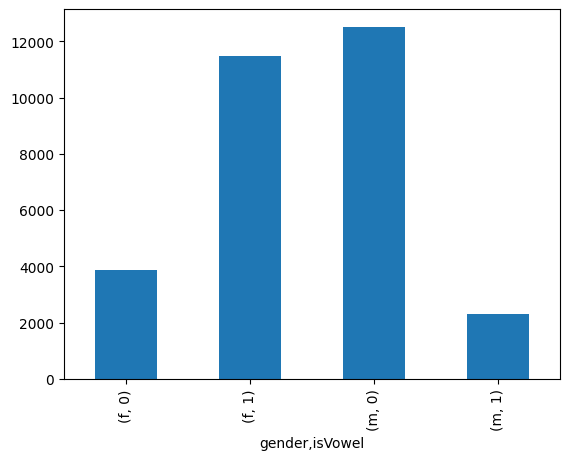

In [12]:
df.groupby(['gender','isVowel'])['name'].count().plot(kind = 'bar')

In [13]:
df

,name,gender,race,firstname,isVowel
20441,jinat,f,indian,jinat,0
1040,arjun yadav,m,indian,arjun,0
22635,nuraish,f,indian,nuraish,0
15391,jyoti devi,f,indian,jyoti,1
15222,kiran,f,indian,kiran,0
...,...,...,...,...,...
2613,amit,m,indian,amit,0
5552,sumit chugh,m,indian,sumit,0
3270,amit sharma @ bablu,m,indian,amit,0
436,sohnal kumar singh,m,indian,sohnal,0


In [14]:
df['NameLen'] = df['firstname'].str.len()
df.drop(['isVowel','race'],axis=1).head()

,name,gender,firstname,NameLen
20441,jinat,f,jinat,5
1040,arjun yadav,m,arjun,5
22635,nuraish,f,nuraish,7
15391,jyoti devi,f,jyoti,5
15222,kiran,f,kiran,5


In [15]:
df.groupby(['gender'])['NameLen'].mean()

gender
f    5.558856
m    5.817016
Name: NameLen, dtype: float64

In [16]:
# To remove Hindi character names
df['firstname'] = df["firstname"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [17]:
# To remove digits
df['firstname'] = df['firstname'].str.replace('\d+', '')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\4252243330.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['firstname'] = df['firstname'].str.replace('\d+', '')


In [18]:
df

,name,gender,race,firstname,isVowel,NameLen
20441,jinat,f,indian,jinat,0,5
1040,arjun yadav,m,indian,arjun,0,5
22635,nuraish,f,indian,nuraish,0,7
15391,jyoti devi,f,indian,jyoti,1,5
15222,kiran,f,indian,kiran,0,5
...,...,...,...,...,...,...
2613,amit,m,indian,amit,0,4
5552,sumit chugh,m,indian,sumit,0,5
3270,amit sharma @ bablu,m,indian,amit,0,4
436,sohnal kumar singh,m,indian,sohnal,0,6


In [19]:
clean_df = df.drop(columns=['name', 'race', 'NameLen'])
clean_df

,gender,firstname,isVowel
20441,f,jinat,0
1040,m,arjun,0
22635,f,nuraish,0
15391,f,jyoti,1
15222,f,kiran,0
...,...,...,...
2613,m,amit,0
5552,m,sumit,0
3270,m,amit,0
436,m,sohnal,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(clean_df.gender)
clean_df.gender = le.transform(clean_df.gender)

In [21]:
clean_df.head()

,gender,firstname,isVowel
20441,0,jinat,0
1040,1,arjun,0
22635,0,nuraish,0
15391,0,jyoti,1
15222,0,kiran,0


In [22]:
le.classes_

array(['f', 'm'], dtype=object)

In [23]:
clean_df[:30]

,gender,firstname,isVowel
20441,0,jinat,0
1040,1,arjun,0
22635,0,nuraish,0
15391,0,jyoti,1
15222,0,kiran,0
27844,0,ku.,0
2759,1,amit,0
14279,1,sagan,0
26748,0,sunita,1
8383,1,rajesh,0


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

#Preprocessing:TFID
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(analyzer='char', ngram_range=(3, 3)), "firstname"),
    ("num", StandardScaler(), ["isVowel"])
])

#Pipeline
pipeline = make_pipeline(
    preprocessor,
    LinearSVC(max_iter=10000)
)

#CV
scores = cross_val_score(pipeline, clean_df, clean_df["gender"], cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.91251036 0.91151616 0.91614186 0.91150149 0.91183295]
Mean accuracy: 0.9127005625948952


In [25]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [26]:
import pickle
pipeline.fit(clean_df, clean_df["gender"])
with open("gender_predictor.pkl", "wb") as f:
    pickle.dump(pipeline, f)


Applying the model to the CD data below.

In [27]:
country_df = pd.read_csv("Customer_List_MAX.csv")

In [28]:
country_df.head()

,Unnamed: 0,customer_id,first_name,last_name
0,0,1991,Mr Sandeep Kumar,NaN
1,1,2082,Vivek Joshi,NaN
2,2,3449,Mr Dinesh,NaN
3,3,4083,Rajeshwari,NaN
4,4,4598,RUMIKA,NaN


In [29]:
country_df['first_name'] = country_df['first_name'].str.replace(
    r'^(mr\.?|ms\.?|mrs\.?|dr\.?)\s+', '', 
    case=False, 
    regex=True
)
country_df

,Unnamed: 0,customer_id,first_name,last_name
0,0,1991,Sandeep Kumar,NaN
1,1,2082,Vivek Joshi,NaN
2,2,3449,Dinesh,NaN
3,3,4083,Rajeshwari,NaN
4,4,4598,RUMIKA,NaN
...,...,...,...,...
843562,843562,7315007,Neha,NaN
843563,843563,9007626,sharma,NaN
843564,843564,714310,pooja Ghosalkar,NaN
843565,843565,15518971,Manchala Srikanth,NaN


In [30]:
country_df_new = (country_df.assign( firstname = lambda x : x.first_name.str.split(' ').str[0]))

In [31]:
country_df_new[:30]

,Unnamed: 0,customer_id,first_name,last_name,firstname
0,0,1991,Sandeep Kumar,NaN,Sandeep
1,1,2082,Vivek Joshi,NaN,Vivek
2,2,3449,Dinesh,NaN,Dinesh
3,3,4083,Rajeshwari,NaN,Rajeshwari
4,4,4598,RUMIKA,NaN,RUMIKA
5,5,5438,Soni,NaN,Soni
6,6,5762,Kapil,NaN,Kapil
7,7,6223,Maanvi,NaN,Maanvi
8,8,6990,D Mohapatra,NaN,D
9,9,7643,Nidhi,NaN,Nidhi


In [32]:
country_df_new = country_df_new.drop(columns=['Unnamed: 0'])
country_df_new

,customer_id,first_name,last_name,firstname
0,1991,Sandeep Kumar,NaN,Sandeep
1,2082,Vivek Joshi,NaN,Vivek
2,3449,Dinesh,NaN,Dinesh
3,4083,Rajeshwari,NaN,Rajeshwari
4,4598,RUMIKA,NaN,RUMIKA
...,...,...,...,...
843562,7315007,Neha,NaN,Neha
843563,9007626,sharma,NaN,sharma
843564,714310,pooja Ghosalkar,NaN,pooja
843565,15518971,Manchala Srikanth,NaN,Manchala


In [33]:
country_df_new = country_df_new[~(country_df_new['firstname'].astype(str).str.strip().eq('') | 
                      country_df_new['firstname'].astype(str).str.isnumeric())]


In [34]:
country_df_new['firstname'] = country_df_new['firstname'].str.replace(
    r'[^a-zA-Z0-9\s]', '', regex=True
).str.strip().str.replace(r'\s+', ' ', regex=True)
country_df_new[:30]

C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\3796248927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_new['firstname'] = country_df_new['firstname'].str.replace(


,customer_id,first_name,last_name,firstname
0,1991,Sandeep Kumar,NaN,Sandeep
1,2082,Vivek Joshi,NaN,Vivek
2,3449,Dinesh,NaN,Dinesh
3,4083,Rajeshwari,NaN,Rajeshwari
4,4598,RUMIKA,NaN,RUMIKA
5,5438,Soni,NaN,Soni
6,5762,Kapil,NaN,Kapil
7,6223,Maanvi,NaN,Maanvi
8,6990,D Mohapatra,NaN,D
9,7643,Nidhi,NaN,Nidhi


In [35]:
country_df_new['firstname'] = country_df_new['firstname'].str.lower()
country_df_new[:30]

C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\2542545090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_new['firstname'] = country_df_new['firstname'].str.lower()


,customer_id,first_name,last_name,firstname
0,1991,Sandeep Kumar,NaN,sandeep
1,2082,Vivek Joshi,NaN,vivek
2,3449,Dinesh,NaN,dinesh
3,4083,Rajeshwari,NaN,rajeshwari
4,4598,RUMIKA,NaN,rumika
5,5438,Soni,NaN,soni
6,5762,Kapil,NaN,kapil
7,6223,Maanvi,NaN,maanvi
8,6990,D Mohapatra,NaN,d
9,7643,Nidhi,NaN,nidhi


In [36]:
pattern = r'^(yes|no|sector)$|^.$|sector'

country_df_new = country_df_new[~country_df_new['firstname'].str.strip().str.contains(pattern, na=False)]
country_df_new

C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\2987459477.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  country_df_new = country_df_new[~country_df_new['firstname'].str.strip().str.contains(pattern, na=False)]


,customer_id,first_name,last_name,firstname
0,1991,Sandeep Kumar,NaN,sandeep
1,2082,Vivek Joshi,NaN,vivek
2,3449,Dinesh,NaN,dinesh
3,4083,Rajeshwari,NaN,rajeshwari
4,4598,RUMIKA,NaN,rumika
...,...,...,...,...
843562,7315007,Neha,NaN,neha
843563,9007626,sharma,NaN,sharma
843564,714310,pooja Ghosalkar,NaN,pooja
843565,15518971,Manchala Srikanth,NaN,manchala


In [37]:
country_df_new = country_df_new.dropna(subset=["firstname"])

In [38]:
import pickle
import pandas as pd
def ends_with_vowel(name):
    return int(str(name).strip()[-1].lower() in "aeiou") if isinstance(name, str) and name else 0

country_df_new["isVowel"] = country_df_new["firstname"].apply(ends_with_vowel)
model_input = country_df_new[["firstname", "isVowel"]].copy()

with open("gender_predictor.pkl", "rb") as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(model_input)

country_df_new["predicted_gender"] = predictions
country_df_new["predicted_gender_label"] = country_df_new["predicted_gender"].map({0: "Female", 1: "Male"})

country_df_new.to_csv("V2_cust_list_pred_genders.csv", index=False)



C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\703759624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_new["isVowel"] = country_df_new["firstname"].apply(ends_with_vowel)
C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\703759624.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_new["predicted_gender"] = predictions
C:\Users\Cd-User\AppData\Local\Temp\ipykernel_8516\703759624.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram